<a href="https://colab.research.google.com/github/Rsych/Neural-Network-Basic/blob/master/ML_1_TF_simple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train linear model

## Import dependencies 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import logging
import numpy as np

In [ ]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

In [ ]:
c_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
f_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(c_q):
    print(f'{c_q} degrees Celcius = {f_a[i]} degrees Fahrenheit')

[-40. -10.   0.   8.  15.  22.  38.] degrees Celcius = -40.0 degrees Fahrenheit
[-40. -10.   0.   8.  15.  22.  38.] degrees Celcius = 14.0 degrees Fahrenheit
[-40. -10.   0.   8.  15.  22.  38.] degrees Celcius = 32.0 degrees Fahrenheit
[-40. -10.   0.   8.  15.  22.  38.] degrees Celcius = 46.0 degrees Fahrenheit
[-40. -10.   0.   8.  15.  22.  38.] degrees Celcius = 59.0 degrees Fahrenheit
[-40. -10.   0.   8.  15.  22.  38.] degrees Celcius = 72.0 degrees Fahrenheit
[-40. -10.   0.   8.  15.  22.  38.] degrees Celcius = 100.0 degrees Fahrenheit


### Some Machine Learning terminology

 - **Feature** - The input(s) to our model. In this case, a single value - the degrees in Celcius.
 - **Labels** - The output our model predicts. In this case, a single value - the degrees in Fahrenheit.
 - **Example** - A pair of inputs/outputs used during training. In our case a pair of values from `c_q` and `f_a` at a specific index, such as `(22,72)`.

## Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network, Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll build a layer with following configuration:

 - `input_shape=[1]` - This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.
 - `units=1` - This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output - a single float value representing degrees Fahrenheit. (In a multi-layered network ,the size and shape of the layer would need to match the `input_shape` of the next layer.

In [ ]:
from keras.layers import Dense
from keras import Sequential

model = tf.keras.Sequential()

model.add(Dense(units=1, input_shape=[1]))

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:
 - ***Loss function*** - A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)
 - ***Optimizer function*** - A way of adjusting internal values in order to reduce the loss.

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=opt, loss='mean_squared_error')

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [ ]:
history = model.fit(c_q, f_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

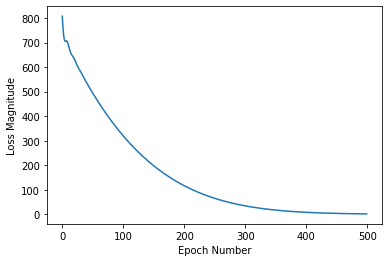

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [ ]:
print(model.predict([100.0]))

[[211.55746]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer.

In [ ]:
print(f'These are the layer ariables: {model.get_weights()}')

These are the layer ariables: [array([[1.808263]], dtype=float32), array([30.731163], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [ ]:
model = Sequential()
model.add(Dense(units=4, input_shape=[1]))
model.add(Dense(units=4))
model.add(Dense(units=1))
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='mean_squared_error')
model.fit(c_q, f_a, epochs=500, verbose=False)
print('Finished training the model')
print(model.predict([100.0]))
print(f'Model predicts that 100 degrees Celsius is: {model.predict([100.0])}')
print(f'These are the weights: {model.get_weights()}')

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]]
These are the weights: [array([[ 0.6145599 ,  0.16734736, -0.07563966,  0.45187804]],
      dtype=float32), array([ 3.4721174, -2.4661448, -3.3634384,  3.4598906], dtype=float32), array([[ 0.9033373 ,  0.19357805, -0.63236445, -0.79650885],
       [-0.55480653, -0.11248215, -0.00374274,  0.22401352],
       [-0.5254635 , -0.2119959 ,  0.7407405 ,  1.0840354 ],
       [ 0.8093311 , -0.271667  , -0.66537344,  0.2090459 ]],
      dtype=float32), array([ 3.428331 , -0.9212124, -3.5645888, -3.4170005], dtype=float32), array([[ 1.300278  ],
       [ 0.05180428],
       [-0.40180495],
       [-0.842267  ]], dtype=float32), array([3.3372066], dtype=float32)]
